# Imports

In [100]:
import tensorflow as tf
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from PIL import Image 
import os

In [101]:
print(tf.__version__)

2.19.0


In [102]:
fmnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels), (test_images, test_labels) = fmnist.load_data()

In [103]:
training_images.shape

(60000, 28, 28)

In [104]:
np.set_printoptions(linewidth=320)
index = 2


print(training_images[index])

[[  0   0   0   0   0   0   0   0   0  22 118  24   0   0   0   0   0  48  88   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12 100 212 205 185 179 173 186 193 221 142  85   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  85  76 199 225 248 255 238 226 157  68  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  91  69  91 201 218 225 209 158  61  93  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  79  89  61  59  87 108  75  56  76  97  73   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  75  89  80  80  67  63  73  83  80  96  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  77  88  77  80  83  83  83  83  81  95  76   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  89  96  80  83  81  84  85  85  85  97  84   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  93  97  81  85  84  85  87  88  84  99  8

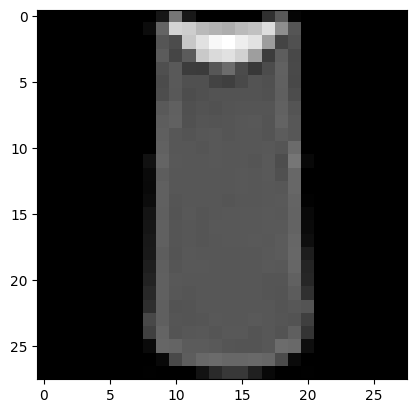

In [105]:
plt.imshow(training_images[index], cmap='gray')

In [106]:
training_images / 255
test_images / 255 


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

# Training

## Deep Neural Network

In [107]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [108]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
physical_devices = tf.config.list_physical_devices('GPU')

class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs['accuracy'] > 0.865:
      print("\n\nAccuracy reached 87 percent")
      self.model.stop_training = True

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(training_images, training_labels, epochs=10, callbacks=[MyCallback()])

Num GPUs Available:  0
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7327 - loss: 13.7636
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8215 - loss: 0.5413
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8349 - loss: 0.4864
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8353 - loss: 0.4944
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8417 - loss: 0.4734
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8414 - loss: 0.4773
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8453 - loss: 0.4591
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8457 - loss: 0.4582
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8470 - loss: 0.4597
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8512 - loss: 0.4389


In [109]:
print(model.evaluate(training_images, training_labels))
print(model.evaluate(test_images, test_labels))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - accuracy: 0.8381 - loss: 0.4506
[0.4503991901874542, 0.8376500010490417]
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.8161 - loss: 0.5520
[0.5588801503181458, 0.8165000081062317]


# Predict

# Random Photo Testing

Image loaded successfully from images/images-removebg-preview.png


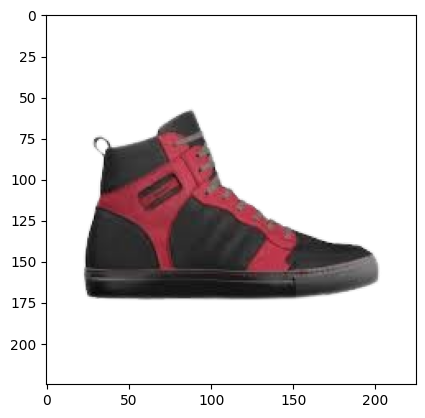

Image converted to grayscale. Mode: L, Size: (225, 225)


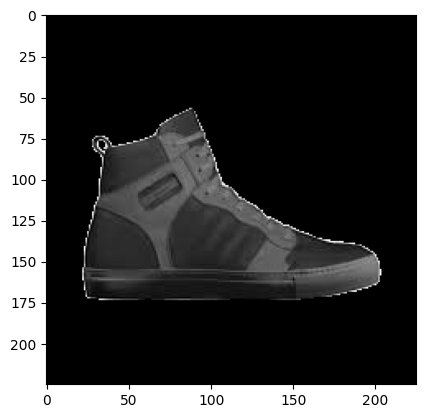

Image resized to: (28, 28)
Image converted to NumPy array. Shape: (28, 28), Data type: uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   1   1   0  24  52  21   0   1   0   0   0   0   0   0   0   0   0   0   0 

In [110]:
image_path = 'images/images-removebg-preview.png'

# Check if file exists before trying to open
if not os.path.exists(image_path):
    print(f"Error: Image file not found at {image_path}")
else:
    try:
        img = Image.open(image_path)
        print(f"Image loaded successfully from {image_path}")

        plt.imshow(img)
        plt.show()

        # --- 3. Convert to Grayscale ---
        img_gray = img.convert('L') # 'L' mode is for grayscale
        print(f"Image converted to grayscale. Mode: {img_gray.mode}, Size: {img_gray.size}")

        plt.imshow(img_gray, cmap='gray')
        plt.show()

        # --- 4. Resize to 28x28 pixels ---
        # Use LANCZOS (or Resampling.LANCZOS in newer Pillow) for high-quality downscaling
        img_resized = img_gray.resize((28, 28), Image.Resampling.LANCZOS)
        print(f"Image resized to: {img_resized.size}")

        # --- 5. Convert to NumPy Array ---
        img_array = np.array(img_resized)
        print(f"Image converted to NumPy array. Shape: {img_array.shape}, Data type: {img_array.dtype}")

        print(img_array)
        
        # --- 6. Normalize Pixel Values (0-1 range) ---
        # Ensure array is float type for division
        img_normalized = img_array.astype('float32') / 255.0
        print("Pixel values normalized to range [0, 1].")
        
        print(img_normalized)

        # --- 7. Reshape for Model Input (CRITICAL STEP!) ---
        # This depends on how your model's first layer expects the input.

        # OPTION A: If your first layer is Flatten(input_shape=(28, 28))
        # The model expects a flat vector of 784 pixels, in a batch of 1.
        # Reshape from (28, 28) to (1, 784)
        img_final = img_normalized.reshape(1, 28, 28)
        print(f"Image reshaped for Flatten input layer. Shape: {img_final.shape}")
        

        # --- 8. Make Prediction ---
        print("Making prediction...")
        predictions = model.predict(img_final)
        # predictions will be an array of probabilities for each class, shape (1, 10)
        print(f"Raw predictions (probabilities): {predictions}")

        # --- 9. Interpret the Prediction ---
        predicted_class_index = np.argmax(predictions[0]) # Get index with highest probability
        confidence = np.max(predictions[0]) # Get the highest probability value

        # Define FMNIST class names (order matters!)
        class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

        predicted_class_name = class_names[predicted_class_index]

        print(f"\nPredicted Class: {predicted_class_name} (Index: {predicted_class_index})")
        print(f"Confidence: {confidence:.4f}")

    except Exception as e:
        print(f"An error occurred during processing: {e}")

# Training

## Convolutional Neural Network
https://www.coursera.org/learn/introduction-tensorflow/ungradedLab/mxQ5h/try-it-for-yourself-lab-1/lab?path=%2Flab%2Ftree%2FC1_W3_Lab_1_improving_accuracy_using_convolutions.ipynb

In [111]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
    # Add convolutions and max pooling
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)


MODEL TRAINING:


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7769 - loss: 1.1348
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8744 - loss: 0.3419
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8896 - loss: 0.2941
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8992 - loss: 0.2678
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9080 - loss: 0.2467

MODEL EVALUATION:
test set accuracy: 0.8837000131607056
test set loss: 0.3287184536457062
